CC Cet has some archival UVES spectra that ESO has processed! Let's have a look.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
# path =  '/media/david/5tb_storage1/cc_cet/uves/'
path = '/media/david/1tb_storage1/emergency_data/cc_cet/uves/'

In [6]:
specs = glob.glob('{}*.fits'.format(path))
specs

['/media/david/1tb_storage1/emergency_data/cc_cet/uves/ADP.2020-09-01T15 53 01.123.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/uves/ADP.2020-09-01T15 53 01.174.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/uves/ADP.2020-09-01T15 54 42.325.fits',
 '/media/david/1tb_storage1/emergency_data/cc_cet/uves/ADP.2020-09-01T15 54 42.356.fits']

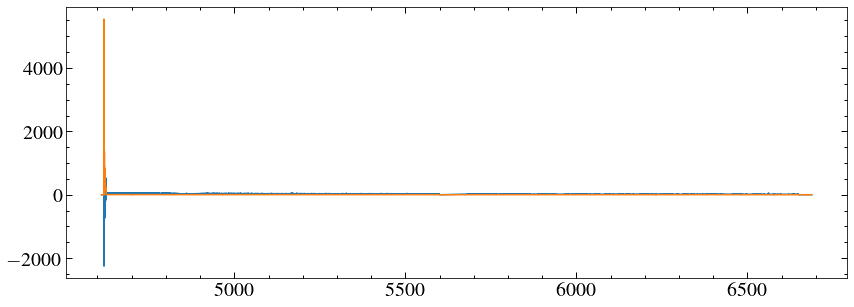

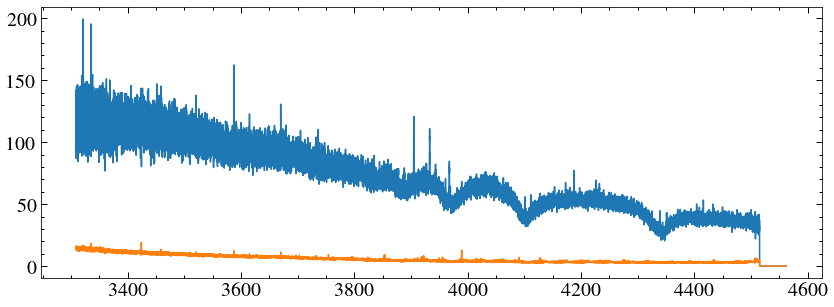

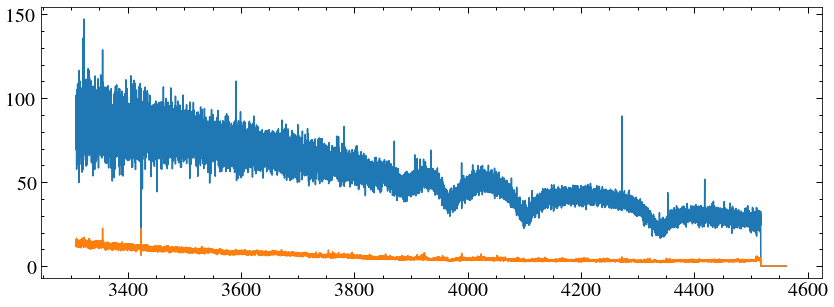

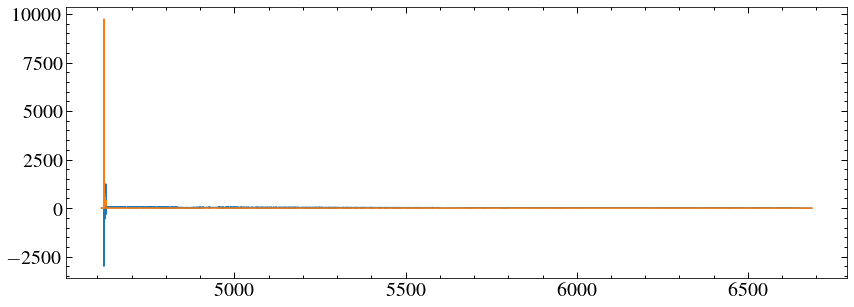

In [18]:
for spec in specs:
    data = fits.getdata(spec, 1)[0]
    #print(data.names)
    plt.plot(data['WAVE'][1000:], data['FLUX'][1000:])
    plt.plot(data['WAVE'][1000:], data['ERR'][1000:])
    plt.show()
    #print(data)

In [8]:
hdul = fits.open(specs[0])

In [9]:
hdul.info()

Filename: /media/david/1tb_storage1/emergency_data/cc_cet/uves/ADP.2020-09-01T15 53 01.123.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     957   ()      
  1  SPECTRUM      1 BinTableHDU     71   1R x 6C   [65264E, 65264E, 65264E, 65264E, 65264E, 65264E]   


In [24]:
for spec in specs:
    hdr = fits.getheader(spec)
    print(hdr['DATE-OBS'], (hdr['WAVELMIN']+hdr['WAVELMAX'])/2, hdr['EXPTIME'], hdr['ARCFILE'])

2001-02-07T01:27:42.810 563.5661 599.9991 ADP.2020-09-01T15:53:01.123.fits
2001-02-07T01:27:44.233 392.1789 600.0024 ADP.2020-09-01T15:53:01.174.fits
2001-02-08T01:36:22.407 392.17665 600.0022 ADP.2020-09-01T15:54:42.325.fits
2001-02-08T01:36:21.194 563.48665 599.999 ADP.2020-09-01T15:54:42.356.fits


In [19]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2020-08-14T14:20:07' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
MJD-OBS =       51947.06091216 / MJD start (2001-02-07T01:27:42.811)            
DATE-OBS= '2001-02-07T01:27:42.810' / Date of observation                       
INSTRUME= 'UVES    '           / Instrument used                                
OBSERVER= 'UNKNOWN '           / Name of observer                               
PI-COI  = 'UNKNOWN '           / Name of PI-COI                                 
TELESCOP= 'ESO-VLT-U2'      

2001-02-07T01:27:42.810


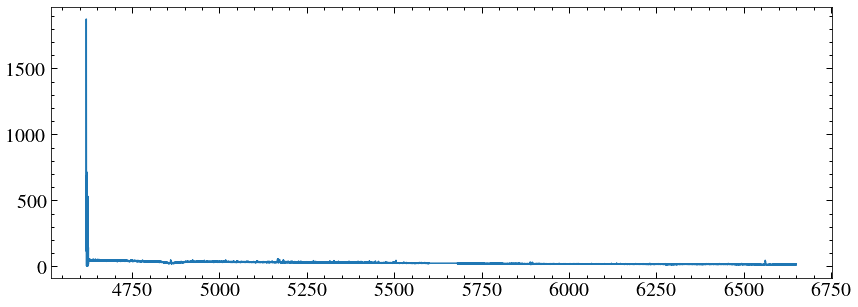

2001-02-07T01:27:44.233


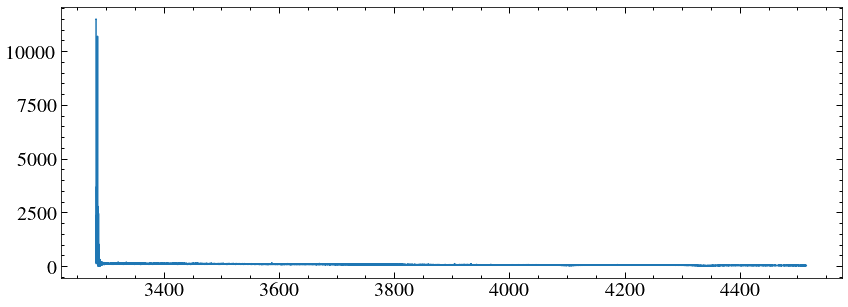

2001-02-08T01:36:22.407


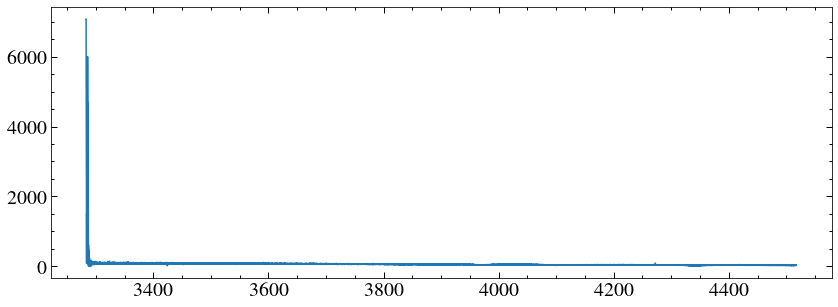

2001-02-08T01:36:21.194


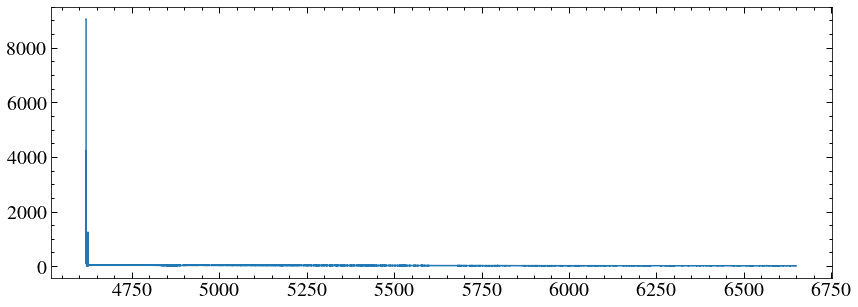

In [11]:
smooth = 10
for spec in specs:
    date = fits.getheader(spec, 0)['DATE-OBS']
    print(date)
    data = fits.getdata(spec, 1)[0]
    w, f, e = data['WAVE'], data['FLUX'], data['ERR']
    mask =  (f > 0)
    w, f, e = w[mask], f[mask], e[mask]
   # f = convolve(f,Box1DKernel(smooth))
    
  #  clip = 50
   #w, f, e = w[clip:-clip], f[clip:-clip], e[clip:-clip]
    plt.plot(w,f)
   #if w[-1] < 5000:
  #      plt.xlim(3900, 3970)
   # else:
    #    plt.xlim(6000, 7000)
   # plt.xlim(4500, 4700)
    plt.show()

In [12]:
dates = []
for spec in specs:
    date = fits.getheader(spec, 0)['DATE-OBS']
    dates.append(date[:date.find('T')])
dates = np.unique(np.array(dates))
print (dates)

['2001-02-07' '2001-02-08']


2001-02-07
2001-02-08


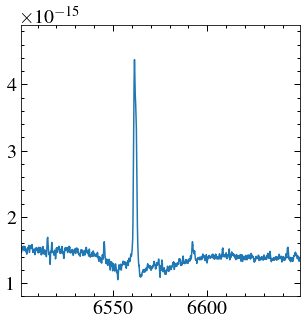

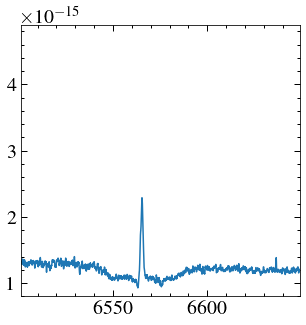

In [13]:
for date in dates:
    print(date)
    plt.figure(figsize=(5,5))
    w, f, e = np.array([], dtype=float), np.array([], dtype=float), np.array([], dtype=float)
    for spec in specs:
        datei = fits.getheader(spec, 0)['DATE-OBS']
        #print(datei)
        if datei[:datei.find('T')] == date:
            data = fits.getdata(spec, 1)[0]
            wi, fi, ei = data['WAVE'], data['FLUX'], data['ERR']
            mask =  (fi > 0)
            wi, fi, ei = wi[mask], fi[mask], ei[mask]
            if wi[0] > 4000:
                mask =  (wi > 4630)
                wi, fi, ei = wi[mask], fi[mask], ei[mask]
            w = np.concatenate((w, wi))
            f = np.concatenate((f, fi*1e-16))
            e = np.concatenate((e, ei*1e-16))
    f = convolve(f,Box1DKernel(smooth))
    plt.plot(w, f)
   # plt.plot(w, e)
   # savdat = Table([w, f, e], names=['#WAVELENGTH', 'FLUX', 'ERROR'])
    #ascii.write(savdat, '{}cc_cet_uves_{}.dat'.format(path, date), format='basic', overwrite=True)
    plt.xlim(6501,6649)
    plt.ylim(0.8e-15, 4.9e-15)
   # plt.show()

In [14]:
dats = glob.glob('{}/*.dat'.format(path))
plt.figure(figsize=(5,5))
for dat in dats:
    w, f, e = np.loadtxt(dat, unpack=True)
    
    f = convolve(f,Box1DKernel(smooth))
    plt.plot(w, f)
   # plt.plot(w, e)
   # savdat = Table([w, f, e], names=['#WAVELENGTH', 'FLUX', 'ERROR'])
    #ascii.write(savdat, '{}cc_cet_uves_{}.dat'.format(path, date), format='basic', overwrite=True)
    plt.xlim(6501,6649)
    plt.ylim(0.8e-15, 4.9e-15)
   # plt.show()

<Figure size 360x360 with 0 Axes>

In [15]:
# from matplotlib.animation import FuncAnimation



# from matplotlib.animation import FuncAnimation

# fig, ax = plt.subplots(figsize=(5,5))
# fig.set_tight_layout(True)

# #ax[0].plot(t, f_lc)
# #ax[0].set_xlabel('Time (s)')
# #ax[0].set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$)')
# #ax[0].set_ylim(0.4, 1.2)
# ax.set_xlim(6491, 6649)
# ax.set_ylim(0.8e-15, 4.9e-15)

# #line, = ax[0].plot([0,0], [-0.1e-12,1.3e-12], 'C1--', linewidth=2)
# ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
# ax.set_xlabel('Wavelength (\AA)')
# ax.axvline(6562.77, ls='--', c='C1', alpha=0.5)
# #[ax[1].axvline(line, ls='--', c='r') for line in [8498.02,8542.09,8662.14]]


# #ext = hdul[1::][0]
# #dt = ext.data[0]
# #w, f = dt['WAVELENGTH'], dt['FLUX']
# w, f, e = np.array([], dtype=float), np.array([], dtype=float), np.array([], dtype=float)
# #w, f, e  = np.loadtxt(csv_files[0], unpack=True, delimiter=',')
# line1, = ax.step(w,f, where='mid')

# def update(i):
#     #time = t[i]
#     #line.set_xdata([t[i], t[i]])
#     #ext = hdul[1::][i]
#     #dt = ext.data[0]
#     w, f,e  = np.loadtxt(dats[i], unpack=True)
#     f = convolve(f,Box1DKernel(smooth))
#     line1.set_xdata(w)
#     line1.set_ydata(f)
#     return ax, line1

# anim = FuncAnimation(fig, update, frames=np.arange(len(dats)), interval=500)
# anim.save('test.gif', dpi=80, writer='imagemagick')
# plt.show()

